In [1]:
import os
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
from cmdstanpy import cmdstan_path, set_cmdstan_path

# set the path to the CmdStan installation
system_drive = os.environ.get("SystemDrive", "C:")
print(system_drive)
path_to_cmdstan = os.path.join(system_drive + os.sep, "Users", "fonta", "cmdstan")
print(path_to_cmdstan)
set_cmdstan_path(path_to_cmdstan)

cmdstan_path()

C:
C:\Users\fonta\cmdstan


'C:\\Users\\fonta\\cmdstan'

In [3]:
from cmdstanpy import CmdStanModel

In [4]:
# for reproducibility
__NP_SEED__ = 23456789
np.random.seed(__NP_SEED__)

# Code-along Chapter 16

## Code 1

First example from pp. 371

In [5]:
MODEL_filename = "code1_pp371.stan"

In [6]:
MCMC_chains = 4
MCMC_warm_up_iters = 100
MCMC_sampling_iters = 200

In [7]:
true_mu = 1.5
true_sigma = 0.2
num_samples = 100
y_data = np.random.normal(loc=true_mu, scale=true_sigma, size=num_samples)
data = {'N': num_samples, 'Y': y_data}

In [9]:
# Instantiate a STAN model
stan_model_parent_dir = os.getcwd()
print(stan_model_parent_dir)
model = CmdStanModel(stan_file=os.path.join(stan_model_parent_dir, MODEL_filename))
print(model)
print(model.exe_info())

08:47:46 - cmdstanpy - INFO - compiling stan file D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code1_pp371.stan to exe file D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code1_pp371.exe


d:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16


08:48:11 - cmdstanpy - INFO - compiled model executable: D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code1_pp371.exe


CmdStanModel: name=code1_pp371
	 stan_file=D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code1_pp371.stan
	 exe_file=D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code1_pp371.exe
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '36', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [10]:
data

{'N': 100,
 'Y': array([1.63290717, 1.43238488, 1.17230402, 1.62825962, 1.48232305,
        1.50517632, 1.45781022, 1.59047804, 1.15006324, 1.56890383,
        1.49345325, 1.31004745, 1.57038034, 1.34450145, 1.66695644,
        1.39536162, 1.28008734, 1.39972361, 1.51670911, 1.26945793,
        1.65314499, 1.69806149, 1.53387605, 1.43781938, 1.76896092,
        1.82197289, 1.81100111, 1.32705573, 1.6382056 , 1.59811842,
        1.42540738, 1.90082054, 1.22013223, 1.42796735, 1.88428318,
        1.73771045, 1.46378035, 1.57199046, 1.57882484, 1.06687837,
        1.40245484, 1.15979569, 1.59400048, 1.11804595, 1.3705525 ,
        1.33576324, 1.12622872, 1.59867025, 1.46539321, 1.54931585,
        1.60573548, 1.55039837, 1.39667265, 1.4468176 , 1.57246399,
        1.36441306, 1.54437493, 1.29115587, 1.58148904, 1.58016566,
        1.4251406 , 1.35544149, 1.48793945, 1.71766639, 1.16122511,
        1.49722888, 1.70305431, 1.5805446 , 1.67405101, 1.43744042,
        1.22805598, 1.492949  , 

In [11]:
fit = model.sample(
    data=data,
    chains=MCMC_chains,
    iter_warmup=MCMC_warm_up_iters,
    iter_sampling=MCMC_sampling_iters,
    show_console=True
)

08:48:11 - cmdstanpy - INFO - Chain [1] start processing
08:48:11 - cmdstanpy - INFO - Chain [2] start processing
08:48:11 - cmdstanpy - INFO - Chain [3] start processing
08:48:11 - cmdstanpy - INFO - Chain [4] start processing
08:48:12 - cmdstanpy - INFO - Chain [2] done processing
08:48:12 - cmdstanpy - INFO - Chain [1] done processing
08:48:12 - cmdstanpy - INFO - Chain [4] done processing
08:48:12 - cmdstanpy - INFO - Chain [3] done processing
08:48:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code1_pp371.stan', line 29, column 8 to column 33)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code1_pp371.stan', line 29, column 8 to column 33)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code1_pp371.stan', line 29, column 8 to column 33)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code1_pp371.stan', line 29, column 8 

Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 200
Chain [2] num_warmup = 100
Chain [2] save_warmup = false (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = true (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = false (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [2] max_depth = 10 (Default)
Chain [2] metric = diag_e (Default)
Chain [2] metric_file =  (Default)
Chain [2] stepsize = 1 (Default)
Chain [2] stepsize_jitter = 0 (Default)
Chain [2] num_chains = 1 (Default)
Chain [2] id = 2
Chain [2] data
Chain [2] file = C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\hgzs2tmb.json
Chain [2] init = 2 (Default)
Chain [2] random
Chain [2] seed = 56925
Chain [2]

In [12]:
fit

CmdStanMCMC: model=code1_pp371 chains=4['method=sample', 'num_samples=200', 'num_warmup=100', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_1.csv
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_2.csv
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_3.csv
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_4.csv
 output_files:
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_0-stdout.txt
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_1-stdout.txt
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_2-stdout.txt
	C:\Users\fonta\AppData\Local\Temp\tmp7b3bh_ld\code1_pp3718hd8qrr3\code1_pp371-20250226084811_3-stdout.txt

In [13]:
print("Cmdstan Config", fit.metadata.cmdstan_config, sep="\n")
print("Stan Vars", fit.metadata.stan_vars, sep="\n")
print("Method Vars", fit.metadata.method_vars, sep="\n")

Cmdstan Config
{'stan_version_major': 2, 'stan_version_minor': 36, 'stan_version_patch': 0, 'model': 'code1_pp371_model', 'start_datetime': '2025-02-26 08:48:12 UTC', 'method': 'sample', 'num_samples': 200, 'num_warmup': 100, 'save_warmup': 0, 'thin': 1, 'engaged': 1, 'gamma': 0.05, 'delta': 0.8, 'kappa': 0.75, 't0': 10, 'init_buffer': 75, 'term_buffer': 50, 'window': 25, 'save_metric': 0, 'algorithm': 'hmc', 'engine': 'nuts', 'max_depth': 10, 'metric': 'diag_e', 'metric_file': '', 'stepsize': 1, 'stepsize_jitter': 0, 'num_chains': 1, 'id': 1, 'data_file': 'C:\\Users\\fonta\\AppData\\Local\\Temp\\tmp7b3bh_ld\\hgzs2tmb.json', 'init': 2, 'seed': 56925, 'diagnostic_file': '', 'refresh': 100, 'sig_figs': -1, 'profile_file': 'profile.csv', 'save_cmdstan_config': 0, 'num_threads': 1, 'stanc_version': 'stanc3 v2.36.0-32-g1b601d5', 'raw_header': 'lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigmaSq,sigma,aMax_indicator,aMin_indicator', 'column_names': ('lp__',

In [14]:
(
    fit.metadata.cmdstan_config['num_warmup'],
    fit.metadata.cmdstan_config['num_samples'],
    # fit.metadata.cmdstan_config['num_chains'],
    fit.chains,
    fit.metadata.cmdstan_config['draws_warmup'],
    fit.metadata.cmdstan_config['draws_sampling'],
    fit.metadata.cmdstan_config['algorithm'],
    fit.metadata.cmdstan_config['engine'],
)

(100, 200, 4, 0, 200, 'hmc', 'nuts')

In [15]:
fit.summary(percentiles=[5, 25, 50, 75, 95], sig_figs=2)

,Mean,MCSE,StdDev,MAD,5%,25%,50%,75%,95%,ESS_bulk,ESS_tail,R_hat
lp__,110.000,0.05900,0.9700,0.6900,100.000,110.000,110.000,110.000,110.000,310.0,590.0,1.0
mu,1.500,0.00065,0.0190,0.0190,1.500,1.500,1.500,1.500,1.500,880.0,390.0,1.0
sigmaSq,0.035,0.00033,0.0049,0.0045,0.028,0.032,0.035,0.038,0.044,250.0,250.0,1.0
sigma,0.190,0.00087,0.0130,0.0120,0.170,0.180,0.190,0.190,0.210,250.0,250.0,1.0
aMax_indicator,0.750,0.01600,0.4300,0.0000,0.000,0.000,1.000,1.000,1.000,760.0,760.0,1.0
aMin_indicator,0.690,0.01700,0.4600,0.0000,0.000,0.000,1.000,1.000,1.000,780.0,780.0,1.0


In [16]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

The following parameters had rank-normalized split R-hat greater than 1.01:
  sigmaSq, sigma
Such high values indicate incomplete mixing and biased estimation.
You should consider regularizating your model with additional prior information or a more effective parameterization.

Processing complete.



In [17]:
fit.stan_variables().keys()

dict_keys(['mu', 'sigmaSq', 'sigma', 'aMax_indicator', 'aMin_indicator'])

In [18]:
(
    fit.stan_variable("mu").shape,
    fit.stan_variable("mu").shape == (MCMC_chains * MCMC_sampling_iters, )
 )

((800,), True)

In [19]:
df_draws = fit.draws_pd()
df_draws

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigmaSq,sigma,aMax_indicator,aMin_indicator
0,1.0,1.0,1.0,106.015,0.997667,0.021444,4.0,19.0,0.0,-104.724,1.49232,0.028755,0.169575,1.0,0.0
1,1.0,2.0,2.0,106.679,0.915698,0.021444,3.0,9.0,0.0,-105.356,1.48550,0.032848,0.181239,1.0,1.0
2,1.0,3.0,3.0,106.426,0.912479,0.021444,3.0,11.0,0.0,-106.152,1.50503,0.034339,0.185309,1.0,0.0
3,1.0,4.0,4.0,104.966,0.993341,0.021444,3.0,11.0,0.0,-102.865,1.49860,0.026437,0.162596,1.0,0.0
4,1.0,5.0,5.0,104.966,0.891755,0.021444,1.0,3.0,0.0,-104.386,1.49860,0.026437,0.162596,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.0,196.0,796.0,106.115,0.996483,0.020462,2.0,7.0,0.0,-106.074,1.50531,0.038815,0.197014,1.0,0.0
796,4.0,197.0,797.0,105.441,0.967559,0.020462,2.0,7.0,0.0,-105.054,1.46658,0.040441,0.201099,1.0,1.0
797,4.0,198.0,798.0,105.634,0.989553,0.020462,3.0,15.0,0.0,-104.082,1.46414,0.032756,0.180986,1.0,1.0
798,4.0,199.0,799.0,106.349,0.996560,0.020462,2.0,7.0,0.0,-105.594,1.47455,0.033218,0.182258,1.0,1.0


Text(0.5, 1.0, 'Histogram of sigma')

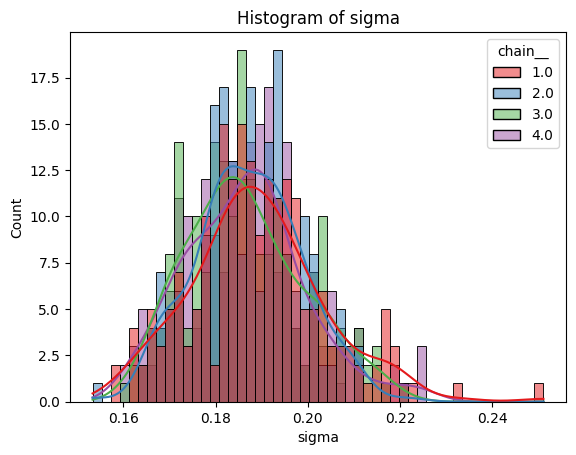

In [20]:
# plot histogram of var with hue by chain
# var_name = "mu"
var_name = "sigma"

sns.histplot(
    data=df_draws, 
    x=var_name, 
    hue='chain__', 
    bins=50, 
    kde=True, 
    palette=sns.color_palette("Set1", n_colors=MCMC_chains)
)
plt.title(f"Histogram of {var_name}")

Text(0.5, 1.0, 'Histogram of mu')

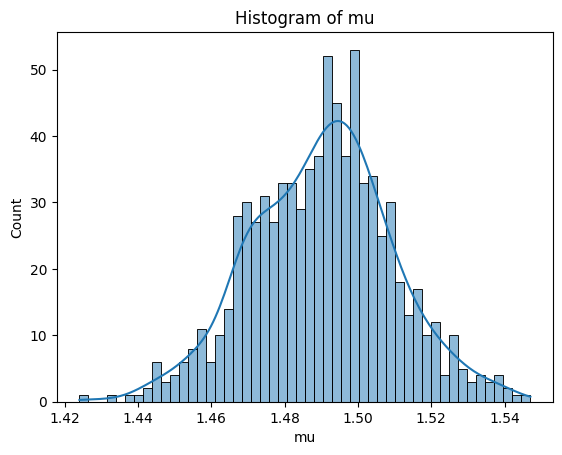

In [21]:
# plot histogram of var (all chains)
var_name = "mu"
# var_name = "sigma"

sns.histplot(
    data=df_draws, 
    x=var_name,  
    bins=50, 
    kde=True
)
plt.title(f"Histogram of {var_name}")

## Code 2

Introducing functions in pp. 381

In [22]:
MODEL_filename_2 = "code2_pp381.stan"

In [23]:
num_samples_2 = 100

# weights
true_mu_x = 60
true_sigma_x = 10
x_data = np.random.normal(loc=true_mu_x, scale=true_sigma_x, size=num_samples_2)

# heights model as function of weights
true_beta = 0.3
true_sigma_2 = 0.3
y_data = true_beta * np.log(x_data) + np.random.normal(loc=0, scale=true_sigma_2, size=num_samples_2)

data_2 = {'N': num_samples, 'Y': y_data, 'X': x_data}

In [24]:
# Instantiate a STAN model
stan_model_parent_dir = os.getcwd()
print(stan_model_parent_dir)
model_2 = CmdStanModel(stan_file=os.path.join(stan_model_parent_dir, MODEL_filename_2))
print(model_2)
print(model_2.exe_info())

d:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16
CmdStanModel: name=code2_pp381
	 stan_file=D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code2_pp381.stan
	 exe_file=D:\Dropbox\github\fontanads\statsdojo\stan\examples\lambert\ch16\code2_pp381.exe
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '36', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [25]:
fit2 = model_2.sample(
    data=data_2,
    chains=MCMC_chains,
    iter_warmup=MCMC_warm_up_iters,
    iter_sampling=MCMC_sampling_iters,
    show_console=True
)

08:48:13 - cmdstanpy - INFO - Chain [1] start processing
08:48:13 - cmdstanpy - INFO - Chain [2] start processing
08:48:13 - cmdstanpy - INFO - Chain [3] start processing
08:48:13 - cmdstanpy - INFO - Chain [4] start processing
08:48:13 - cmdstanpy - INFO - Chain [2] done processing
08:48:13 - cmdstanpy - INFO - Chain [3] done processing
08:48:13 - cmdstanpy - INFO - Chain [1] done processing
08:48:13 - cmdstanpy - INFO - Chain [4] done processing
08:48:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code2_pp381.stan', line 29, column 4 to column 24)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code2_pp381.stan', line 29, column 4 to column 24)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code2_pp381.stan', line 29, column 4 to column 24)
	Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'co

Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 200
Chain [1] num_warmup = 100
Chain [1] save_warmup = false (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = true (Default)
Chain [1] gamma = 0.05 (Default)
Chain [2] method = sample (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = false (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [2] sample
Chain [2] num_samples = 200
Chain [2] num_warmup = 100
Chain [2] save_warmup = false (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = true (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Ch

In [26]:
fit2.summary(percentiles=[5, 25, 50, 75, 95], sig_figs=2)

,Mean,MCSE,StdDev,MAD,5%,25%,50%,75%,95%,ESS_bulk,ESS_tail,R_hat
lp__,58.00,0.07400,1.0000,0.6800,56.0,58.00,58.00,59.00,59.00,270.0,250.0,1.0
beta,0.31,0.00032,0.0085,0.0084,0.3,0.30,0.31,0.32,0.32,700.0,550.0,1.0
sigma,0.34,0.00260,0.0240,0.0230,0.3,0.32,0.34,0.35,0.38,130.0,330.0,1.0
